## "И какой же русский не любит быстрой езды?"
*Гоголь  Н.В., "Мертвые души"*
 
<br>

Никаких дополнительных билбиотек, чистый питон.

Учимся писать быстрые, оптимальные решения и оценивать сложность.



In [1]:
import sem3_tests

### Problem 0. Some words about data structures and complexity

https://habr.com/ru/post/188010/



In [2]:
import random
import time


def test_time(my_structure, iterations):
    start_time = time.time()
    for _ in range(iterations):
        random.randint(0, pow(2, 31)) in my_structure
    print("Execution time {}".format(time.time() - start_time))


STRUCTURE_SIZE = 100000
ITERATIONS = 10000

my_list = list(range(STRUCTURE_SIZE))
my_set = set(my_list)

# Feel the difference
test_time(my_list, ITERATIONS)
test_time(my_set, ITERATIONS)
    

Execution time 11.920474767684937
Execution time 0.01770496368408203


Just compare
http://fooplot.com/#W3sidHlwZSI6MCwiZXEiOiJ4IiwiY29sb3IiOiIjMDAwMDAwIn0seyJ0eXBlIjowLCJlcSI6ImxvZyh4KSIsImNvbG9yIjoiIzAwMDAwMCJ9LHsidHlwZSI6MCwiZXEiOiJ4XjIiLCJjb2xvciI6IiMwMDAwMDAifSx7InR5cGUiOjAsImVxIjoieCpsb2coeCkiLCJjb2xvciI6IiMwMDAwMDAifSx7InR5cGUiOjEwMDAsIndpbmRvdyI6WyItMTUzLjgzODA2NjE4OTM1NzU2IiwiMTQxLjc0NzcxMTg4Njg0MzQzIiwiLTg0LjIwNDU1OTk5MTM2MjkzIiwiOTcuNjk0MzgwMzYzMjIyMyJdLCJzaXplIjpbOTUwLDUwMF19XQ--

### Problem 1. Two Sum Jewels and Stones

https://leetcode.com/problems/jewels-and-stones/

You're given strings J representing the types of stones that are jewels, and S representing the stones you have.  Each character in S is a type of stone you have.  You want to know how many of the stones you have are also jewels.

The letters in J are guaranteed distinct, and all characters in J and S are letters. Letters are case sensitive, so "a" is considered a different type of stone from "A".

In [9]:
# iterating by stones
def num_jewels_in_stones(J, S):
    count = 0
    for stone in S:
        if stone in J:
            count += 1
    return count

sem3_tests.test_num_jewels_in_stones(num_jewels_in_stones)

OK!


In [12]:
# iterating by jewels
def num_jewels_in_stones(J, S):
    count_of_jewels = 0
    
    for j in J:
        count_of_jewels += S.count(j)
    
    return count_of_jewels

sem3_tests.test_num_jewels_in_stones(num_jewels_in_stones)

OK!


In [11]:
'AaaaaVX'.count('a')

4

### Problem 2. Simple moving average

https://en.wikipedia.org/wiki/Moving_average

OK!


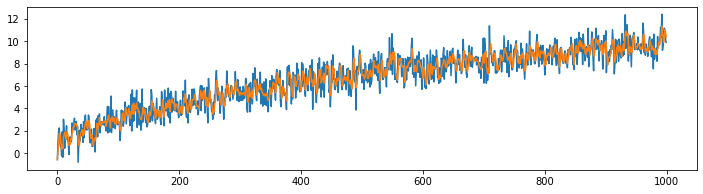

In [24]:
def moving_average(array, window):
    sum_ = 0
    # создаем список такого же размера, но заполняем нулями
    result = list(0 for x in array)
    #result = [0] * len(array)
 
    for i in range(0, window):
        sum_ = sum_ + array[i]
        result[i] = sum_ / (i+1)
 
    for i in range(window, len(array)):
        sum_ = sum_ - array[i-window] + array[i]
        result[i] = sum_ / window
 
    return result

sem3_tests.test_simple_moving_avarage(moving_average)
sem3_tests.visual_test_simple_moving_avarage(moving_average, 3)

In [55]:
array = [3, 9, 12, 15, 18, 24]
window = 3
sum_ = 0
result = list(0 for x in array)
result

[0, 0, 0, 0, 0, 0]

In [56]:
for i in range(0, window):
    print(i, result, sum_)
    sum_ = sum_ + array[i]
    result[i] = sum_ / (i+1)
    print(i, result, sum_)

0 [0, 0, 0, 0, 0, 0] 0
0 [3.0, 0, 0, 0, 0, 0] 3
1 [3.0, 0, 0, 0, 0, 0] 3
1 [3.0, 6.0, 0, 0, 0, 0] 12
2 [3.0, 6.0, 0, 0, 0, 0] 12
2 [3.0, 6.0, 8.0, 0, 0, 0] 24


In [57]:
result, sum_

([3.0, 6.0, 8.0, 0, 0, 0], 24)

In [58]:
for i in range(window, len(array)):
    print('sum_ =', sum_, '–', array[i-window], '+', array[i])
    sum_ = sum_ - array[i-window] + array[i]
    result[i] = sum_ / window
    print(i, result, sum_)

sum_ = 24 – 3 + 15
3 [3.0, 6.0, 8.0, 12.0, 0, 0] 36
sum_ = 36 – 9 + 18
4 [3.0, 6.0, 8.0, 12.0, 15.0, 0] 45
sum_ = 45 – 12 + 24
5 [3.0, 6.0, 8.0, 12.0, 15.0, 19.0] 57


### Problem 3. Two Sum
Given an array of integers, return indices of the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

Example:

nums = [1, 3, 11, 2, 7]

target = 9

output = (3, 4)

In [59]:
def two_sum_naive(nums, target):
    for i in range(len(nums)):
        for j in range(i+1, len(nums)):
            if nums[i] + nums[j] == target:
                return i, j
    return "no such nums"

sem3_tests.test_two_sum(two_sum_naive)

OK!


In [62]:
def two_sum(nums, target):
    d = {}
    for i in range(len(nums)):
        if nums[i] in d:
            return (d[nums[i]], i)
        else:
            d[target - nums[i]] = i
    return

sem3_tests.test_two_sum(two_sum)

OK!


In [63]:
d = {}

In [68]:
d[1] = 2

In [69]:
d

{1: 2}

In [70]:
2 in d

False

In [71]:
1 in d

True

### Problem 4. Remove Repeated Spaces 



In [93]:
s = list('a a    a   b   x')
s

['a',
 ' ',
 'a',
 ' ',
 ' ',
 ' ',
 ' ',
 'a',
 ' ',
 ' ',
 ' ',
 'b',
 ' ',
 ' ',
 ' ',
 'x']

In [94]:
def remove_repeated_spaces(string_list):
    last = '-'
    ans = []
    for s in string_list:
        if s == ' ' and last == ' ':
            last = s
        else:
            ans.append(s)
            last = s
    return ans

sem3_tests.test_remove_repeated_spaces(remove_repeated_spaces)

OK!


### Problem 5. Longest substring without repeating characters

Given a string, find the length of the longest substring without repeating characters.

In [97]:
def isUnique(string):
    init_len = len(string)
    set_len = len(set(list(string)))
    if init_len == set_len:
        return True
    else:
        return False

In [99]:
def length_of_longest_substring_naive(string):
    ans = 0
    for i in range(len(string)):
        for j in range(i+1, len(string)):
            if isUnique(string[i:j]):
                ans = max(ans, j - i)
    return ans

sem3_tests.test_longest_substring(length_of_longest_substring_naive)

OK!


In [101]:
def length_of_longest_substring(string):
    n = len(string)
    # стартовый индекс текущей подстроки
    st = 0
    # максимальная длина подстроки без повторяющихся элементов
    maxlen = 0
    # ее стартовый индекс
    start = 0
    # словарь, где будем хранить появление каждой уже посещенной буквы
    pos = {} 
    # последнее появление первой буквы имеет индекс 0
    pos[string[0]] = 0
    for i in range(1, n):
        # если текущая буква еще ни разу не встречалась, то сохраним ее индекс в словаре
        if string[i] not in pos:  
            pos[string[i]] = i 
        else:
        # если эта буква уже есть в словаре, значит, она повторяется
        # проверим, она появлялась до или после начала текущей подстроки
        
        # если появилась после, то обновим текущую максимальную длину и начнем заново
            if pos[string[i]] >= st: 
                currlen = i - st  # обновим текущую макс длину
                if maxlen < currlen:  # если текущая макс длина больше предыдущей, то обновим maxlen 
                                      # и индекс начала подстроки с макс длиной
                    maxlen = currlen  
                    start = st
                # обновим индекс начала новой подстроки, чтобы избежать повторения
                st = pos[string[i]] + 1
        # обновим индекс последнего появления текущей буквы
            pos[string[i]] = i
            
    # сравним последнюю рассмотренную подстроку с максимальной длиной, если ее длина больше, то обновим maxlen
    if maxlen < i - st:  
        maxlen = i - st  
    return maxlen

sem3_tests.test_longest_substring(length_of_longest_substring)

OK!
